### Definição do problema.

Predição do log do erro entre a estimativa da Zillow e o preço atual dos imóveis.

logerror = log(Zestimate) − log(SalePrice).

![](https://storage.googleapis.com/kaggle-competitions/kaggle/6649/media/_zillow_image_2.jpg)

### Importando as bibliotecas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

### Carregando as bases de dados.

In [2]:
properties_2016 = pd.read_csv('../data/properties_2016.csv', nrows=1000000)
train_2016 = pd.read_csv('../data/train_2016_v2.csv', nrows=1000000)

### Formas dos conjuntos de dados.

In [3]:
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

Shape of properties_2016:  (1000000, 58)
Shape of train_2016:  (90275, 3)


In [4]:
properties_2016.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                NaN         NaN                       NaN   
1                NaN         NaN                       NaN   
2                NaN         NaN                       NaN   
3                NaN         NaN                       NaN   
4                NaN         NaN                       NaN   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0                   NaN                   NaN   
3                        5068.0                   NaN                   NaN   
4                        1776.0                   NaN                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6  fips  \
0                   NaN                   NaN                  NaN  6037   
1                   NaN                   NaN                  NaN  6037   
2               73026.0                   NaN                  NaN  6037   
3                5068.0                   NaN                  NaN  6037   
4                1776.0                   NaN                  NaN  6037   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN          NaN           NaN              NaN            NaN   
1           NaN          NaN           NaN              NaN            NaN   
2           NaN          NaN           NaN              NaN            NaN   
3           NaN          NaN           NaN              NaN            NaN   
4           NaN          NaN           NaN              NaN            NaN   

   heatingorsystemtypeid  latitude  longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34144442 -118654084            85768.0      NaN   
1                    NaN  34140430 -118625364             4083.0      NaN   
2                    NaN  33989359 -118394633            63085.0      NaN   
3                    NaN  34148863 -118437206             7521.0      NaN   
4                    NaN  34194168 -118385816             8512.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      010D                    269                NaN   
1                      0109                    261             LCA11*   
2                      1200                     47               LAC2   
3                      1200                     47               LAC2   
4                      1210                     31               LAM1   

   rawcensustractandblock  regionidcity  regionidcounty  regioni

In [5]:
train_2016.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

### Feature	Description:
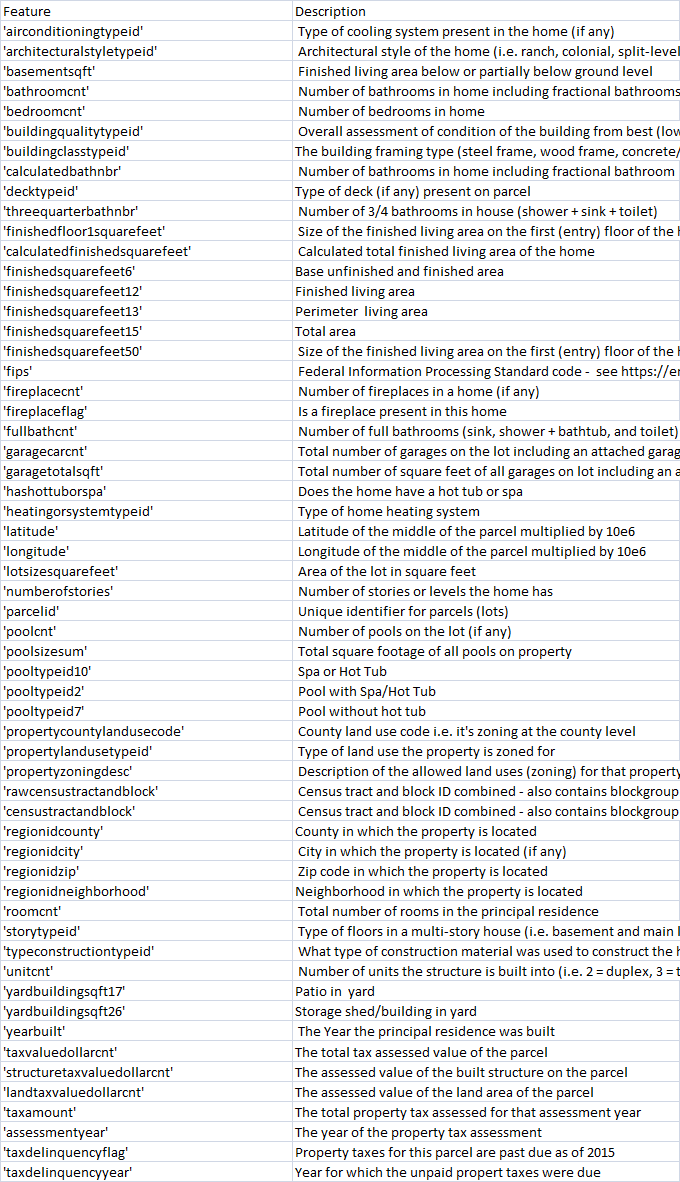

### Juntando os conjuntos de dados.

In [6]:
final_df = properties_2016.copy()
final_df = final_df.merge(train_2016, how = 'inner', on = 'parcelid')

In [7]:
final_df.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                2.5         NaN                     548.0   
1                1.0         NaN                     777.0   
2                2.0         NaN                    1101.0   
3                1.5         NaN                    1554.0   
4                2.5         NaN                    1305.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        1264.0                1264.0                   NaN   
1                         777.0                 777.0                   NaN   
2                        1101.0                1101.0                   NaN   
3                        1554.0                1554.0                   NaN   
4                        2415.0                2415.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6  fips  \
0                   NaN                 548.0                  NaN  6111   
1                   NaN                 777.0                  NaN  6111   
2                   NaN                1101.0                  NaN  6111   
3                   NaN                1554.0                  NaN  6111   
4                   NaN                1305.0                  NaN  6111   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN          2.0           2.0              0.0            NaN   
1           NaN          1.0           1.0              0.0            NaN   
2           NaN          2.0           2.0            441.0            NaN   
3           1.0          1.0           2.0            460.0            NaN   
4           1.0          2.0           2.0            665.0            NaN   

   heatingorsystemtypeid  latitude  longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34303597 -119287236             1735.0      NaN   
1                    NaN  34272866 -119198911                NaN      NaN   
2                    NaN  34340801 -119079610             6569.0      NaN   
3                    NaN  34354313 -119076405             7400.0      NaN   
4                    NaN  34266578 -119165392             6326.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      1128                    265                NaN   
1                      1129                    266                NaN   
2                      1111                    261                NaN   
3                      1110                    261                NaN   
4                      1111                    261                NaN   

   rawcensustractandblock  regionidcity  regionidcounty  regioni

### Shape do conjunto de dados final.

In [8]:
final_df.shape

(30295, 60)

The above reformed dataset contains 90275 rows and 60 columns/variables.

Let's analyse the dataset to identify the following:

* Missing values
* Numerical variables
* Distribution of the numerical variables
* Outliers
* Categorical variables
* Cardinality of the categorical variables
* Potential relationship between the variables and the target: SalePrice

### Criando uma cópia do conjunto de dados.

In [9]:
zillow_df = final_df.copy()

### Colunas do conjunto

In [10]:
zillow_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [11]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30295 entries, 0 to 30294
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      30295 non-null  int64  
 1   airconditioningtypeid         9702 non-null   float64
 2   architecturalstyletypeid      90 non-null     float64
 3   basementsqft                  14 non-null     float64
 4   bathroomcnt                   30295 non-null  float64
 5   bedroomcnt                    30295 non-null  float64
 6   buildingclasstypeid           8 non-null      float64
 7   buildingqualitytypeid         19283 non-null  float64
 8   calculatedbathnbr             29901 non-null  float64
 9   decktypeid                    217 non-null    float64
 10  finishedfloor1squarefeet      2262 non-null   float64
 11  calculatedfinishedsquarefeet  30077 non-null  float64
 12  finishedsquarefeet12          28741 non-null  float64
 13  f

### Estatísticas descritivas

In [12]:
zillow_df.describe()

parcelid  airconditioningtypeid  architecturalstyletypeid  \
count  3.029500e+04            9702.000000                 90.000000   
mean   1.297828e+07               1.808287                  7.544444   
std    2.538825e+06               2.959253                  3.017407   
min    1.071180e+07               1.000000                  2.000000   
25%    1.155590e+07               1.000000                  7.000000   
50%    1.254375e+07               1.000000                  7.000000   
75%    1.421724e+07               1.000000                  7.000000   
max    1.629608e+08              13.000000                 21.000000   

       basementsqft   bathroomcnt    bedroomcnt  buildingclasstypeid  \
count     14.000000  30295.000000  30295.000000                  8.0   
mean     670.571429      2.275342      3.035616                  4.0   
std      407.781751      0.993459      1.153021                  0.0   
min      168.000000      0.000000      0.000000                  4.0   
25%      299.750000      2.000000      2.000000                  4.0   
50%      683.000000      2.000000      3.000000                  4.0   
75%      811.000000      3.000000      4.000000                  4.0   
max     1528.000000     12.000000     16.000000                  4.0   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  \
count            19283.00000       29901.000000       217.0   
mean                 5.57294           2.305007        66.0   
std                  1.89645           0.965030         0.0   
min                  1.00000           1.000000        66.0   
25%                  4.00000           2.000000        66.0   
50%                  7.00000           2.000000        66.0   
75%                  7.00000           3.000000        66.0   
max                 12.00000          12.000000        66.0   

       finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
count               2262.000000                  30077.000000   
mean                1347.713970                   1769.588390   
std                  664.533874                    919.729146   
min                   47.000000                    120.000000   
25%                  925.000000                   1184.000000   
50%                 1242.000000                   1542.000000   
75%                 1611.750000                   2088.000000   
max                 7625.000000                  14484.000000   

       finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
count          28741.000000             11.000000           1201.000000   
mean            1741.897046           1442.181818           2377.946711   
std              902.765807             69.933995           1024.638806   
min              120.000000           1344.000000            646.000000   
25%             1171.000000           1428.000000           1630.000000   
50%             1520.000000           1440.000000           2120.000000   
75%             2052.000000           1440.000000           2829.000000   
max            14484.000000           1584.000000           8558.000000   

       finishedsquarefeet50  finishedsquarefeet6          fips  fireplacecnt  \
count           2262.000000           124.000000  30295.000000   3229.000000   
mean            1353.681698          2324.750000   6048.787754      1.200372   
std              676.703494          1433.635351     20.574998      0.495756   
min               47.000000           257.000000   6037.000000      1.000000   
25%              925.500000           999.500000   6037.000000      1.000000   
50%             1244.000000          1813.000000   6037.000000      1.000000   
75%             1616.000000          3500.000000   6059.000000      1.000000   
max             7625.000000          6337.000000   6111.000000      5.000000   

        fullbathcnt  garagecarcnt  garagetotalsqft  heatingorsystemtypeid  \
count  29901.000000  10030.000000     10030.000000           18849.000000   
mean    

### Listando registros faltantes por variável.

In [13]:
missing_val = [var for var in zillow_df.columns if zillow_df[var].isnull().sum()>0]
zillow_df[missing_val].isnull().sum()

airconditioningtypeid           20593
architecturalstyletypeid        30205
basementsqft                    30281
buildingclasstypeid             30287
buildingqualitytypeid           11012
calculatedbathnbr                 394
decktypeid                      30078
finishedfloor1squarefeet        28033
calculatedfinishedsquarefeet      218
finishedsquarefeet12             1554
finishedsquarefeet13            30284
finishedsquarefeet15            29094
finishedsquarefeet50            28033
finishedsquarefeet6             30171
fireplacecnt                    27066
fullbathcnt                       394
garagecarcnt                    20265
garagetotalsqft                 20265
hashottuborspa                  29532
heatingorsystemtypeid           11446
lotsizesquarefeet                3367
poolcnt                         24272
poolsizesum                     29969
pooltypeid10                    29924
pooltypeid2                     29903
pooltypeid7                     24664
propertyzoni

### Total de variáveis com registros faltantes no conjunto de dados.

In [15]:
len(missing_val)

46

### Variáveis com o tipo de dados numérico.

In [16]:
num_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes!= 'O']
len(num_vars)

54

In [17]:
zillow_df[num_vars].head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                2.5         NaN                     548.0   
1                1.0         NaN                     777.0   
2                2.0         NaN                    1101.0   
3                1.5         NaN                    1554.0   
4                2.5         NaN                    1305.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        1264.0                1264.0                   NaN   
1                         777.0                 777.0                   NaN   
2                        1101.0                1101.0                   NaN   
3                        1554.0                1554.0                   NaN   
4                        2415.0                2415.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6  fips  \
0                   NaN                 548.0                  NaN  6111   
1                   NaN                 777.0                  NaN  6111   
2                   NaN                1101.0                  NaN  6111   
3                   NaN                1554.0                  NaN  6111   
4                   NaN                1305.0                  NaN  6111   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft  \
0           NaN          2.0           2.0              0.0   
1           NaN          1.0           1.0              0.0   
2           NaN          2.0           2.0            441.0   
3           1.0          1.0           2.0            460.0   
4           1.0          2.0           2.0            665.0   

   heatingorsystemtypeid  latitude  longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34303597 -119287236             1735.0      NaN   
1                    NaN  34272866 -119198911                NaN      NaN   
2                    NaN  34340801 -119079610             6569.0      NaN   
3                    NaN  34354313 -119076405             7400.0      NaN   
4                    NaN  34266578 -119165392             6326.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  propertylandusetypeid  \
0          NaN           NaN          NaN          NaN                    265   
1          NaN           NaN          NaN          NaN                    266   
2          NaN           NaN          NaN          NaN                    261   
3          NaN           NaN          NaN          NaN                    261   
4          NaN           NaN          NaN          NaN                    261   

   rawcensustractandblock  regionidcity  regionidcounty  regionidneighborhood  \
0            6.111002e+07       34543.0            2061                   NaN   
1            6.111002e+07       34543.0            2061                   NaN   
2            6.111001e+07       26965.0            2061                   NaN   
3            6.111001e+07       26965.0            2061                   NaN   
4            6.111001e+07       34543.0           

### Variáveis categóricas.

In [18]:
cat_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes == 'O']
len(cat_vars)

6

In [19]:
zillow_df[cat_vars].head()

hashottuborspa propertycountylandusecode propertyzoningdesc fireplaceflag  \
0            NaN                      1128                NaN           NaN   
1            NaN                      1129                NaN           NaN   
2            NaN                      1111                NaN           NaN   
3            NaN                      1110                NaN           NaN   
4            NaN                      1111                NaN           NaN   

  taxdelinquencyflag transactiondate  
0                NaN      2016-01-27  
1                NaN      2016-03-30  
2                NaN      2016-05-27  
3                NaN      2016-06-07  
4                NaN      2016-08-08

### Cardinalidade das variáveis categóricas.

In [20]:
for var in cat_vars:
    print(var, len(zillow_df[var].unique()), "Registros únicos.")

hashottuborspa 2 Registros únicos.
propertycountylandusecode 62 Registros únicos.
propertyzoningdesc 1417 Registros únicos.
fireplaceflag 2 Registros únicos.
taxdelinquencyflag 2 Registros únicos.
transactiondate 335 Registros únicos.


### Variáveis temporais.

In [21]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

### Relacionamento entre as variáveis temporais e o log de erro.
#### Diferença entre o ano que a casa foi construída para o ano que foi vendida.

In [22]:
new_df = zillow_df.copy()
new_df[var] = new_df['assessmentyear'] - new_df['yearbuilt']

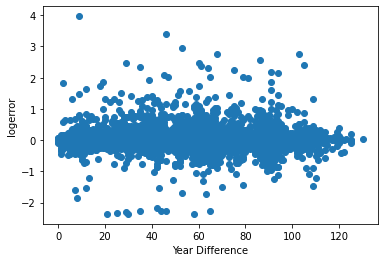

In [23]:
plt.scatter(new_df[var],new_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('logerror')
plt.show()

### Salva o dataset para a etapa de Feature Engineering.

In [23]:
zillow_df.to_csv('zillow.csv', index=False)